In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed


In [ ]:
df.head(10)

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed
5,1006,28,599,0,9,4,2878,Installed
6,1007,49,887,1,9,6,4481,Installed
7,1008,8,31,0,2,1,1715,Installed
8,1009,28,741,1,8,2,801,Installed
9,1010,28,524,1,8,4,4621,Installed


In [ ]:
df.tail()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
994,1995,38,938,0,5,4,1865,Installed
995,1996,43,61,0,6,8,1327,Installed
996,1997,47,761,0,6,1,1936,Installed
997,1998,6,73,1,5,1,3436,Installed
998,1999,9,54,0,4,2,4039,Installed


In [ ]:
df.tail(20)

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
979,1980,2,43,1,5,7,39494,Uninstalled
980,1981,35,223,1,10,7,4328,Installed
981,1982,46,775,0,8,6,3489,Installed
982,1983,48,501,1,6,6,1305,Installed
983,1984,16,795,1,6,6,4027,Installed
984,1985,24,777,1,5,3,905,Installed
985,1986,35,564,0,8,8,4641,Installed
986,1987,35,359,0,6,1,756,Installed
987,1988,24,380,0,9,7,3821,Installed
988,1989,10,23,1,3,3,770,Installed


In [ ]:
df.shape

(999, 8)

In [ ]:
len(df)

999

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   userid                      999 non-null    int64 
 1   Average Screen Time (mins)  999 non-null    int64 
 2   Average Spent on App (INR)  999 non-null    int64 
 3   Left Review                 999 non-null    int64 
 4   Ratings                     999 non-null    int64 
 5   New Password Request        999 non-null    int64 
 6   Last Visited Minutes        999 non-null    int64 
 7   Status                      999 non-null    object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


In [ ]:
df.isnull()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

userid                        0
Average Screen Time (mins)    0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [ ]:
df.dropna()

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed
...,...,...,...,...,...,...,...,...
994,1995,38,938,0,5,4,1865,Installed
995,1996,43,61,0,6,8,1327,Installed
996,1997,47,761,0,6,1,1936,Installed
997,1998,6,73,1,5,1,3436,Installed


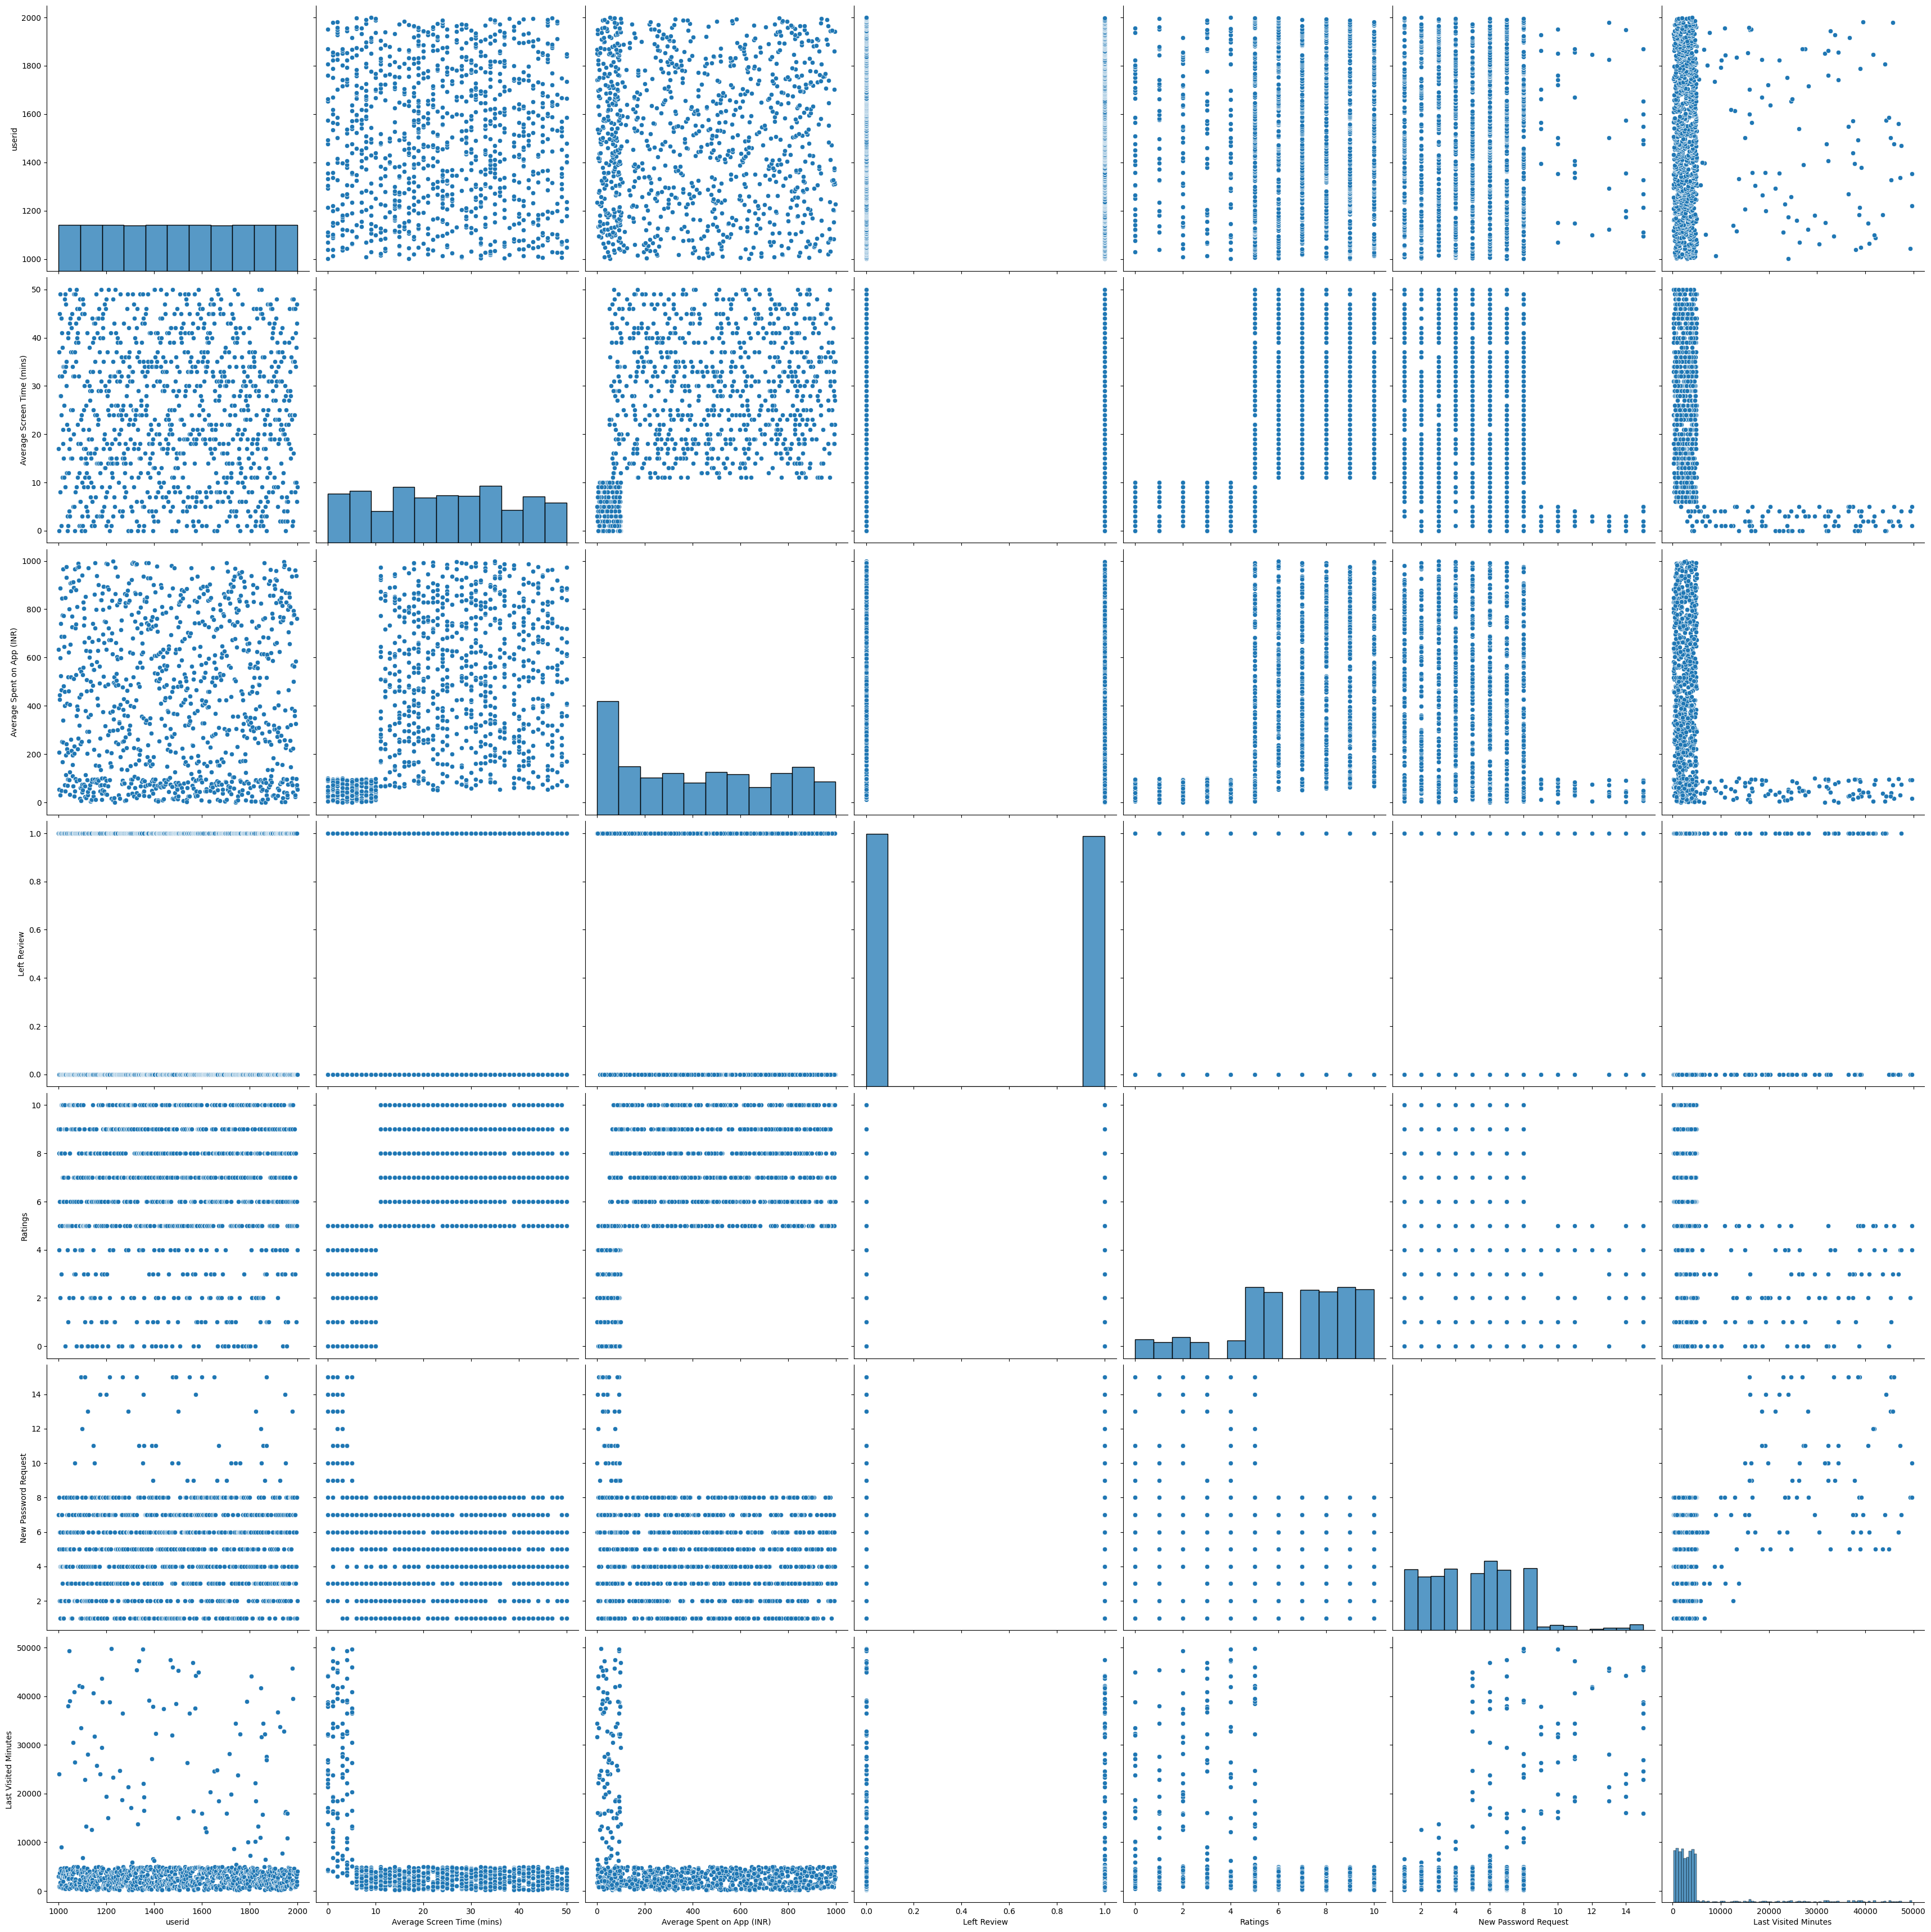

In [ ]:
sn.pairplot(df,size = 5, aspect = 1, kind = 'scatter')
plt.show()

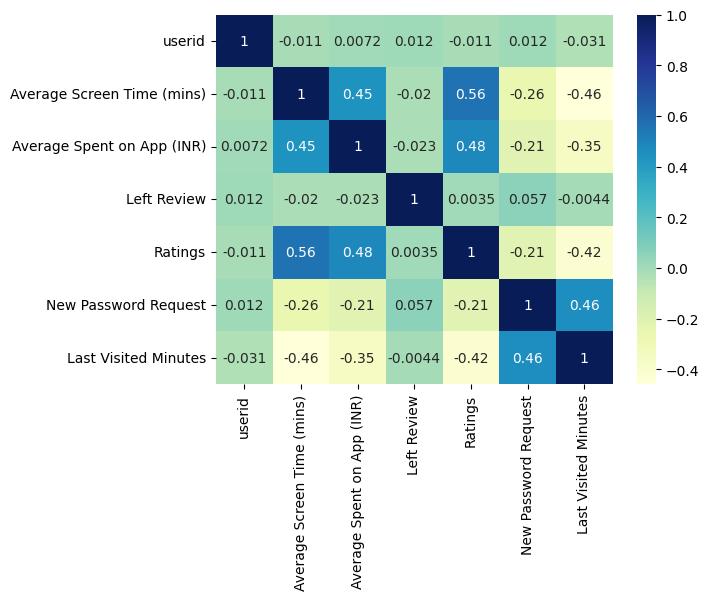

In [ ]:
sn.heatmap(df.corr(), cmap = 'YlGnBu',annot = True)
plt.show()

In [ ]:
# y = c = max1+m2x2+m3x3+......+mn+xn
y = df['Last Visited Minutes']
X = df['Average Screen Time (mins)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

278    36
218    41
909    44
718    43
111    15
Name: Average Screen Time (mins), dtype: int64

In [ ]:
y_train.head()

278    1728
218    3850
909    1176
718     722
111    2148
Name: Last Visited Minutes, dtype: int64

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
X_train_sm.head()

,const,Average Screen Time (mins)
278,1.0,36
218,1.0,41
909,1.0,44
718,1.0,43
111,1.0,15


In [ ]:
lr.params

const                         11863.625659
Average Screen Time (mins)     -273.906048
dtype: float64

In [ ]:
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     Last Visited Minutes   R-squared:                       0.209
Model:                              OLS   Adj. R-squared:                  0.207
Method:                   Least Squares   F-statistic:                     183.7
Date:                  Tue, 27 Feb 2024   Prob (F-statistic):           2.61e-37
Time:                          06:16:25   Log-Likelihood:                -7244.1
No. Observations:                   699   AIC:                         1.449e+04
Df Residuals:                       697   BIC:                         1.450e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

886    -1009.958582
563      907.383751
878     9672.377277
423     3372.538181
146    11315.813563
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

7557.770867093722

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.21297435233667728